In [1]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters

In [2]:
# Gráficos do matplotlib interativos
%matplotlib notebook

In [3]:
# Faz a leitura dos dados

#dados = pd.read_csv('Dados_Flotacao_ConceicaoII_mod3.csv', sep=';')
#dados = pd.read_excel('Dados_Conceicao_Caixa_Alimentacao.xlsx')
dados = pd.read_excel('Marco02/CA_Densidade.xlsx')
target = pd.read_excel('T_Conceicao.xlsx')

In [4]:
# Armazena o tempo da primeira análise
t_inicial = target.iloc[0,0]

In [5]:
bkp = dados.copy()
bkp_t = target.copy()

In [6]:
dados = bkp.copy()
target = bkp_t.copy()

In [15]:
# # Transforma a primeira linha em cabeçalho
# dados.columns = dados.iloc[0]
# 
# # Remove as duas primeiras linhas, que contêm cabeçalhos e nomes de TAGs
# dados = dados.drop([0,1])
# 
# # Refaz a numeração do index
# dados.reset_index(drop=True, inplace=True)
# 
# # Preenche os dados faltantes com zeros
# dados = dados.fillna(0)

In [7]:
# Remove parte dos dados para diminuir o volume de informações para tratamento
#dados = dados[:10169]
#target = target[:38]

base = pd.Timestamp('2019-03-01')
base = base - np.timedelta64(2, 'h') ## Antes do primeiro, para que pegue todos os dados disponíveis
fim = pd.Timestamp('2019-03-03')
bkp_fim = fim

selecao = (dados.iloc[:,0] > base) & (dados.iloc[:,0] <= fim)
dados = dados[selecao]
selecao = (target.iloc[:,0] > base) & (target.iloc[:,0] <= fim)
target = target[selecao]

# Renomeia o cabeçalho de target
target.columns = ['DataHora', 'Ferro', 'Silica']

In [29]:
# # Nome do parâmetro avaliado, encontrado no cabeçalho da segunda coluna do agrupamento
# dados.columns[1]
# 
# Seleciona duas colunas, formando um agrupamento com os dados de um parâmetro
# nivel = dados.iloc[:,[0,1]]
#  
# # Retira os dados nulos
# selecao = nivel.iloc[:,0] != 0
# nivel = nivel[selecao]

In [ ]:
# # Seleciona os dados para o primeiro intervalo de tempo
# selecao = nivel.iloc[:,0] < t_inicial
# primeiro = nivel[selecao]

In [ ]:
# # Identifica o tipo de dado das colunas 'DataHora'
# nivel.iloc[0,0]

In [ ]:
# selecao = nivel.iloc[:,0] < t_inicial
# primeiro = nivel[selecao]
# primeiro

In [18]:
# grupos = pd.DataFrame(columns=[col for col in nivel.columns])
# i = 0
# for amostra in target.iloc[:,0]:
#     if nivel.shape[0] > 0:
#         # Critério de seleção dos dados com base na data e hora
#         selecao = nivel.iloc[:,0] < amostra
#         # Seleciona o conjunto de dados
#         selecionado = nivel[selecao]
#         # Remove os dados da lista original
#         nivel = nivel[~selecao]
#         # Zera o índice para o grupo de dados selecionado
#         selecionado.index = [j for j in range(selecionado.iloc[:,1].shape[0])]
#         # Identifica o grupo
#         selecionado['gr'] = [i for j in range(selecionado.iloc[:,1].shape[0])]
#         
#         grupos = grupos.append(selecionado, sort="False")
#         i += 1
#     
# grupos['gr'] = grupos['gr'].astype(int)
# #grupos.set_index('gr', append=True, inplace=True)

In [94]:
# # Faz a contagem de quantos dados há em cada grupo
# qnt = []
# for i in range(grupos.gr.unique().shape[0]):
#     qnt.append(grupos[grupos['gr'] == i].shape[0])

In [95]:
# quant = np.asarray(qnt)

In [ ]:
# upper_quartile = np.percentile(quant, 75)
# lower_quartile = np.percentile(quant, 25)
# 
# iqr = upper_quartile - lower_quartile
# upper_whisker = quant[quant<=upper_quartile+1.5*iqr].max()
# lower_whisker = quant[quant>=lower_quartile-1.5*iqr].min()

In [19]:
# # Remove o outlier identificado
# selecao = grupos['gr'] != 0
# grupos = grupos[selecao]
# 
# # target.drop(0, axis=0)

<IPython.core.display.Javascript object>


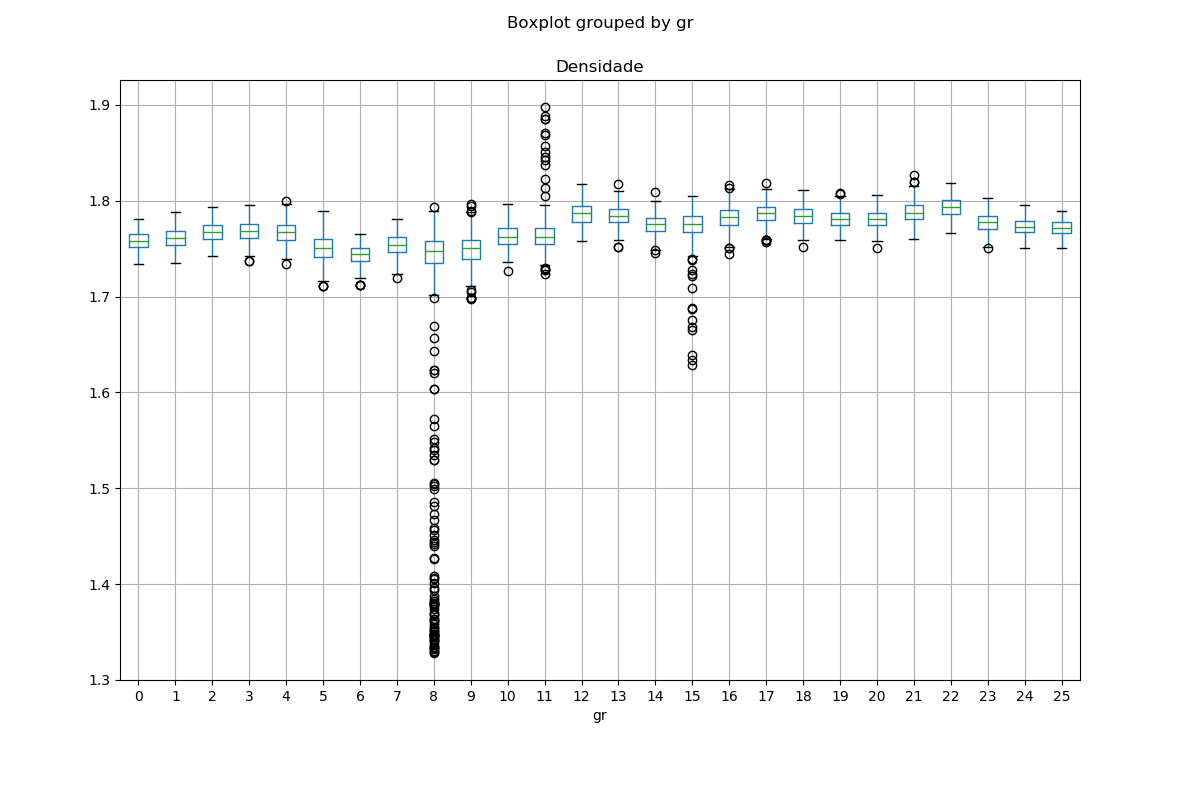

In [8]:
dados.boxplot(['Densidade'], by = 'gr', figsize=(12,8))

In [9]:
x = np.asarray(target.DataHora)
y = np.asarray(target.Ferro)

In [10]:
# Agrupamento dos dados em um só valor
## Média
media = []
for i in range(1,len(x)):
    media.append(dados[dados['gr'] == i]['Densidade'].mean())
    
## Mediana
mediana = []
for i in range(1,len(x)):
    mediana.append(dados[dados['gr'] == i]['Densidade'].median())

In [11]:
# Remover os valores não utilizados
selecao = (dados['gr'] == 0)
dados = dados[~selecao]

selecao = (dados['gr'] == 25)
dados = dados[~selecao]

dados.reset_index(drop=True, inplace=True)

In [12]:
dados['target'] = -1
for linha in dados.index:
    dados.loc[linha,'target'] = x[dados.loc[linha,'gr']]

In [ ]:
teste.set_index('target').groupby(pd.Grouper(key='target')).mean()

In [253]:
np.asarray(teste.groupby(pd.Grouper(key='target')).mean().index)

array(['2019-03-01T00:29:00.000000000', '2019-03-01T02:29:00.000000000',
       '2019-03-01T04:29:00.000000000', '2019-03-01T06:29:00.000000000',
       '2019-03-01T08:29:00.000000000', '2019-03-01T10:29:00.000000000',
       '2019-03-01T12:29:00.000000000', '2019-03-01T14:29:00.000000000',
       '2019-03-01T16:29:00.000000000', '2019-03-01T18:29:00.000000000',
       '2019-03-01T20:29:00.000000000', '2019-03-01T22:29:00.000000000',
       '2019-03-02T00:29:00.000000000', '2019-03-02T02:29:00.000000000',
       '2019-03-02T04:29:00.000000000', '2019-03-02T06:29:00.000000000',
       '2019-03-02T08:29:00.000000000', '2019-03-02T10:29:00.000000000',
       '2019-03-02T12:29:00.000000000', '2019-03-02T14:29:00.000000000',
       '2019-03-02T16:29:00.000000000', '2019-03-02T18:29:00.000000000',
       '2019-03-02T20:29:00.000000000', '2019-03-02T22:29:00.000000000'],
      dtype='datetime64[ns]')

In [26]:
dados.groupby(pd.Grouper(key='target')).mean().index

DatetimeIndex(['2019-03-01 00:29:00', '2019-03-01 02:29:00',
               '2019-03-01 04:29:00', '2019-03-01 06:29:00',
               '2019-03-01 08:29:00', '2019-03-01 10:29:00',
               '2019-03-01 12:29:00', '2019-03-01 14:29:00',
               '2019-03-01 16:29:00', '2019-03-01 18:29:00',
               '2019-03-01 20:29:00', '2019-03-01 22:29:00',
               '2019-03-02 00:29:00', '2019-03-02 02:29:00',
               '2019-03-02 04:29:00', '2019-03-02 06:29:00',
               '2019-03-02 08:29:00', '2019-03-02 10:29:00',
               '2019-03-02 12:29:00', '2019-03-02 14:29:00',
               '2019-03-02 16:29:00', '2019-03-02 18:29:00',
               '2019-03-02 20:29:00', '2019-03-02 22:29:00'],
              dtype='datetime64[ns]', name='target', freq=None)

<IPython.core.display.Javascript object>


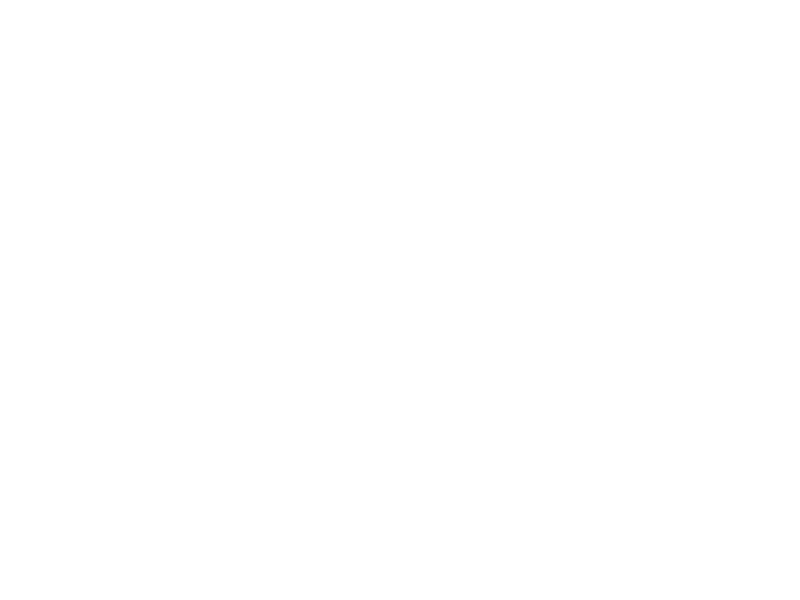

ValueError: zero-size array to reduction operation fmin which has no identity

In [92]:
# Registra o conversor de timestamp para matplotlib de forma explícita
register_matplotlib_converters()

#x = np.asarray(target.DataHora)
x = np.asarray(dados.groupby(pd.Grouper(key='target')).mean().index)
y = np.asarray(target.Ferro)

fig, axes = plt.subplots(1, 1, figsize=(8, 6))
ax = axes

#ax.plot(media, 'r', linewidth=2, label='Média do Nível da Caixa de Alimentação')
#ax.plot(x, mediana, 'black', linewidth=2, label='Mediana do Nível da Caixa de Alimentação')
#ax.plot(y, 'green', linewidth=2, label='Concentração de Ferro')
medianaDF = pd.DataFrame(mediana)
medianaDF.iloc[1:,:].plot.line(ax=ax)

#df = pd.DataFrame(dados.groupby(pd.Grouper(key='target')).mean().index)

#pd.concat([df,medianaDF], axis=1).plot.line(ax=ax)

dados.boxplot(['Densidade'], by = 'target', ax=ax)
#teste.plot.line(ax=ax)

ax.legend(loc='lower right')

plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
yearFmt = mdates.DateFormatter('%d-%m %H:%M')
ax.xaxis.set_major_formatter(yearFmt)

plt.show()

In [36]:
ax.xaxis.get_ticklabels()

<a list of 24 Text major ticklabel objects>

In [24]:
type(dados.target)

pandas.core.series.Series

In [38]:
type(x)

numpy.ndarray

In [81]:
teste.set_index('target', inplace=True)
teste

,dens
target,
2019-03-01 00:29:00,1.761299
2019-03-01 02:29:00,1.766925
2019-03-01 04:29:00,1.768682
2019-03-01 06:29:00,1.767194
2019-03-01 08:29:00,1.750852
2019-03-01 10:29:00,1.744795
2019-03-01 12:29:00,1.753754
2019-03-01 14:29:00,1.747272
2019-03-01 16:29:00,1.750572


<IPython.core.display.Javascript object>


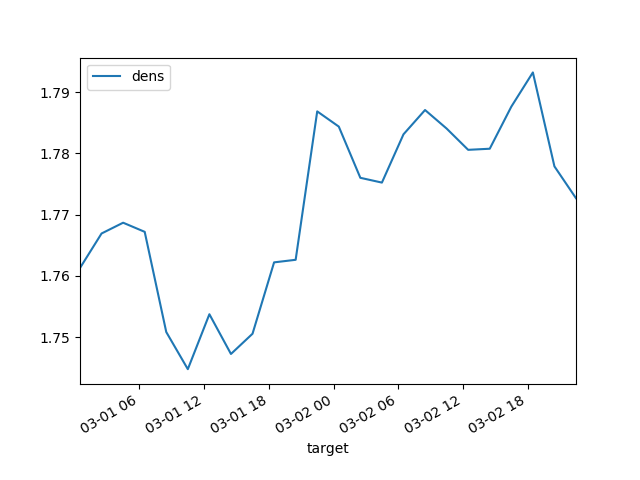

In [84]:
teste.plot.line()

In [76]:
teste = pd.concat([df,medianaDF], axis=1)
teste.columns = ['target', 'dens']
teste

,target,dens
0,2019-03-01 00:29:00,1.761299
1,2019-03-01 02:29:00,1.766925
2,2019-03-01 04:29:00,1.768682
3,2019-03-01 06:29:00,1.767194
4,2019-03-01 08:29:00,1.750852
5,2019-03-01 10:29:00,1.744795
6,2019-03-01 12:29:00,1.753754
7,2019-03-01 14:29:00,1.747272
8,2019-03-01 16:29:00,1.750572
9,2019-03-01 18:29:00,1.762214


<IPython.core.display.Javascript object>


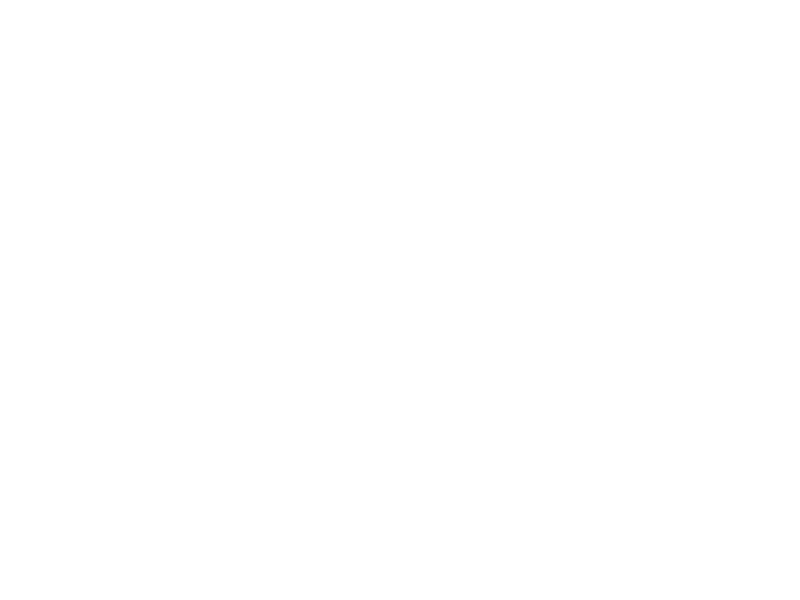

AttributeError: Cannot access attribute 'index' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
ax = axes

#ax.plot(media, 'r', linewidth=2, label='Média do Nível da Caixa de Alimentação')
#ax.plot(x, mediana, 'black', linewidth=2, label='Mediana do Nível da Caixa de Alimentação')
#ax.plot(y, 'green', linewidth=2, label='Concentração de Ferro')

#dados.boxplot(['Densidade'], by = 'target', figsize=(8,6), ax=ax)
ax.boxplot(dados.iloc[:,[1,3]].groupby(pd.Grouper(key='target')))

In [90]:
medianaDF

,0
0,1.761299
1,1.766925
2,1.768682
3,1.767194
4,1.750852
5,1.744795
6,1.753754
7,1.747272
8,1.750572
9,1.762214


In [169]:
dados.iloc[0,3]

Timestamp('2019-03-01 00:29:00')

## Funcionando, ver como fazer para configurar as datas no eixo X
#### Mudar a paleta de cores e definir títulos

https://stackoverflow.com/questions/37219655/matplotlib-how-to-specify-time-locators-start-ticking-timestamp

<IPython.core.display.Javascript object>


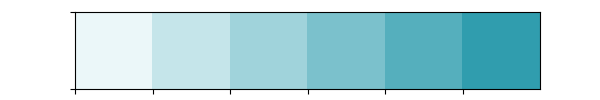

In [49]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

<IPython.core.display.Javascript object>


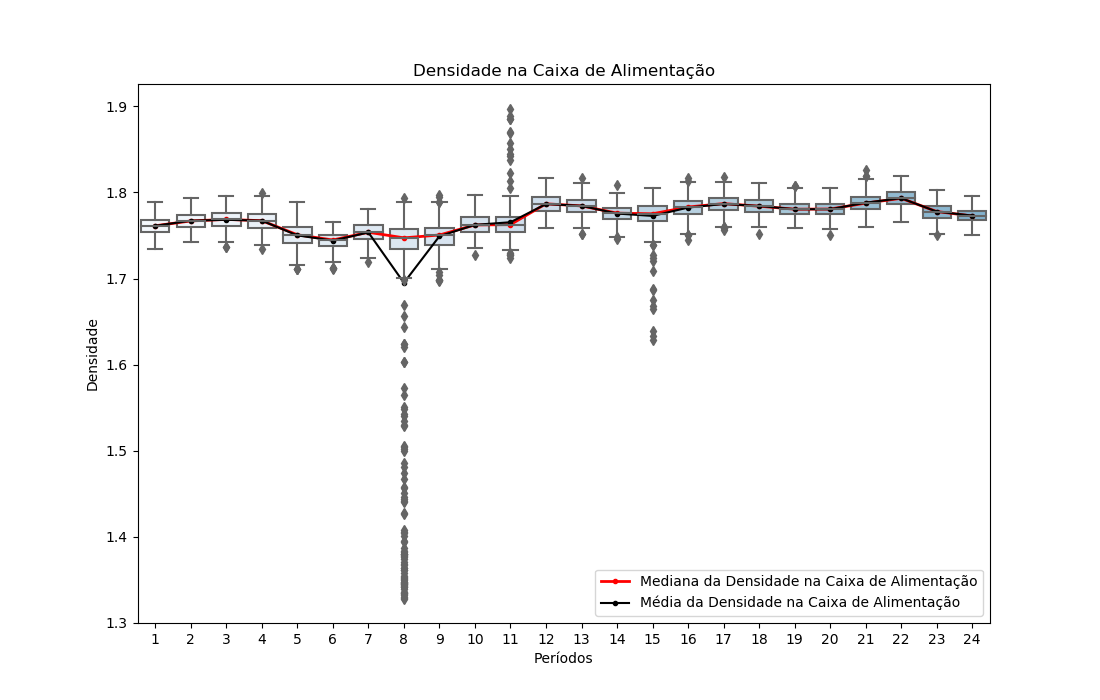

In [65]:
#sns.light_palette("navy", reverse=True)
sns.set_palette("PuBuGn_d")

fig, ax = plt.subplots(1, 1, figsize=(11, 7), sharex=True)

medianaDF = pd.DataFrame(mediana)
mediaDF = pd.DataFrame(media)
ax.plot(medianaDF,'r', linewidth=2, marker='.', linestyle='-', label='Mediana da Densidade na Caixa de Alimentação')
ax.plot(mediaDF, 'black', marker='.', linestyle='-', label='Média da Densidade na Caixa de Alimentação')


#with sns.light_palette("navy", reverse=True):
#with sns.color_palette("PuBuGn_d"):
sns.boxplot(data=dados, x='gr', y='Densidade', ax=ax, palette=sns.color_palette("Blues", 50))

#dados.boxplot(['Densidade'], by = 'target', ax=ax)

ax.legend(loc='lower right')

ax.set_title("Densidade na Caixa de Alimentação")
ax.set_ylabel('Densidade')
ax.set_xlabel('Períodos')

# plt.xticks(rotation=45)
# mdates.MinuteLocator(byminute=range(60))
#
# locator = mdates.HourLocator(byhour=range(1))
# locator.MAXTICKS = 1500
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
#ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=1))
#yearFmt = mdates.DateFormatter('%d-%m %H:%M')
#ax.xaxis.set_major_formatter(yearFmt);
# ax.xaxis.set_minor_formatter(yearFmt);
#ax.format_xdata = mdates.DateFormatter('%d-%m %H:%M')
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.show()

<IPython.core.display.Javascript object>


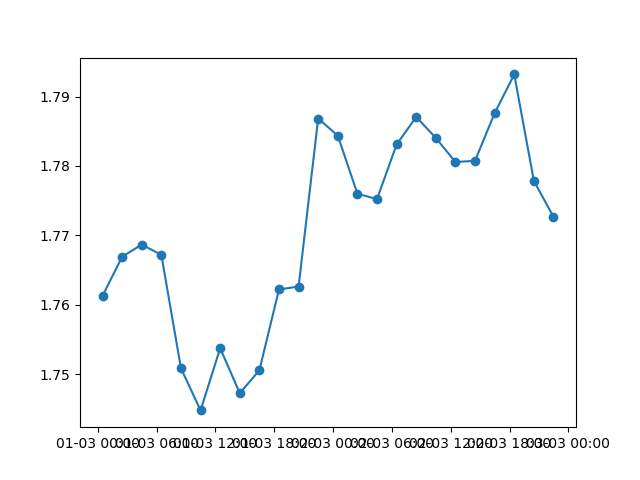

In [95]:
fig, ax = plt.subplots()
ax.plot(teste, marker='o', linestyle='-')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'));
#ax.set_ylabel('Daily Consumption (GWh)')
#ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'));

In [141]:
teste.index

DatetimeIndex(['2019-03-01 00:29:00', '2019-03-01 02:29:00',
               '2019-03-01 04:29:00', '2019-03-01 06:29:00',
               '2019-03-01 08:29:00', '2019-03-01 10:29:00',
               '2019-03-01 12:29:00', '2019-03-01 14:29:00',
               '2019-03-01 16:29:00', '2019-03-01 18:29:00',
               '2019-03-01 20:29:00', '2019-03-01 22:29:00',
               '2019-03-02 00:29:00', '2019-03-02 02:29:00',
               '2019-03-02 04:29:00', '2019-03-02 06:29:00',
               '2019-03-02 08:29:00', '2019-03-02 10:29:00',
               '2019-03-02 12:29:00', '2019-03-02 14:29:00',
               '2019-03-02 16:29:00', '2019-03-02 18:29:00',
               '2019-03-02 20:29:00', '2019-03-02 22:29:00'],
              dtype='datetime64[ns]', name='target', freq=None)

### Testar fução **zip**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()